* Ссылки
  * [Подготовка данных в проекте](https://habr.com/ru/post/470650/).<br>
  * [Разведочный анализ данных](https://www.kaggle.com/emstrakhov/eda-with-pandas).<br>
  * [Построение графиков](https://pcnews.ru/blogs/spargalka_po_vizualizacii_dannyh_v_python_s_pomosu_plotly-986119.html).<br>
  * [Продвинутая визуализация](https://habr.com/ru/company/skillfactory/blog/510320/).<br>
  * [Machine Learning course](https://mlcourse.ai/).<br>
  * [Фреймы в pandas](https://habr.com/ru/company/ruvds/blog/494720/)<br>
  * [Открытие фрейма в pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)<br>
  * [Сортировка в pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html)

In [1]:
from pylab import rcParams
import plotly.graph_objects as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import warnings
import numpy as np
import pandas as pd
import plotly
from IPython.display import Image
import matplotlib
from IPython.core.interactiveshell import InteractiveShell
from wordcloud import WordCloud
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as go
import chart_studio.plotly as py
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 15, 8
pd.set_option('display.width', 85)
pd.set_option('display.max_columns', 8)
init_notebook_mode(connected=True)
pd.options.display.float_format = '{:,.1f}'.format
InteractiveShell.ast_node_interactivity = 'all'



In [2]:
import os.path
os.path.isfile('DayCap.csv')
os.path.exists('../FlightPreparence')

True

True

In [3]:
df = pd.read_csv('DayCap.csv')

In [ ]:
df = pd.read_csv('train.csv')
tsd = pd.read_csv('test.csv')
comb = pd.concat([df, tsd], axis=0)
merg = pd.merge(df, tsd, on=('ID'), how ='left', left_on=('ID'), right_on=('NEW_ID'))

#df = pd.read_csv('AmesHousing.txt', sep="\t", header = 0, encoding='cp1251', index_col=False)
#df = pd.read_csv('beverage_r.csv', sep=";", decimal=',', parse_dates=[0], index_col='numb.obs')
#df = pd.read_csv('diamond.dat', header=None, sep='\s+', names=['weight', 'price'])
#df = pd.read_csv('adult.test', header=None, names=columns, na_values=' ?', skiprows=1)

In [5]:
pd.set_option('display.max_rows', 100)
df.head()

,Time,Vews,ER,ADV,...,IQ,Relevant,Summ,Subscribe
0,12:00:00,3 215,"20,00",1,...,8,8,24,48
1,19:00:00,671,"14,50",1,...,10,9,27,38
2,18:00:00,9 308,"17,50",1,...,5,5,13,47
3,14:00:00,7 642,"9,80",1,...,8,7,19,104
4,15:00:00,294,"30,30",1,...,10,10,27,30


In [21]:
# Фрейм со статистикой по колонкам (для графиков)
df_stat = df.agg(['min','max','count','nunique']).reset_index(drop=False)
df_stat.rename(columns={'min':'Минимальный балл', 'max':'Максимальный балл', 
                      'count':'Всего', 'nunique' : 'Уникальных значений'})

,index,Time,Vews,ER,...,IQ,Relevant,Summ,Subscribe
0,min,1900-01-01 09:00:00,81.0,nan,...,5,1,8,0
1,max,1900-01-01 22:00:00,998.0,nan,...,10,10,28,104
2,count,38,24.0,0.0,...,38,38,38,38
3,nunique,19,23.0,0.0,...,6,10,17,24


In [7]:
len(df['data'].sort_values().unique())
df['data'].sort_values().unique()

KeyError: 'data'

In [22]:
print('Число строк и колонок в таблице: ',df.shape)
print('Типы данных в колонках:','\n',df.dtypes)

Число строк и колонок в таблице:  (38, 9)
Типы данных в колонках: 
 Time         datetime64[ns]
Vews                float64
ER                  float64
ADV                   int64
Size                  int64
IQ                    int64
Relevant              int64
Summ                  int64
Subscribe             int64
dtype: object


In [10]:
df['ER'] = pd.to_numeric(df['ER'], errors='coerce')

In [12]:
df['Vews'] = pd.to_numeric(df['Vews'], errors='coerce')

In [18]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M:%S')

In [19]:
df_numeric = df.select_dtypes(include=[np.number])
num_feat = df_numeric.columns.values
print('Колонки с числовыми значениями:', '\n', num_feat)

Колонки с числовыми значениями: 
 ['Vews' 'ER' 'ADV' 'Size' 'IQ' 'Relevant' 'Summ' 'Subscribe']


In [20]:
df_non_numeric = df.select_dtypes(exclude=[np.number])
cat_feat = df_non_numeric.columns.values
print('Колонки с объектными значениями:', '\n', cat_feat)

Колонки с объектными значениями: 
 ['Time']


In [ ]:
print('Пропущенные значения в колонках:', '\n',df.isnull().sum())

In [9]:
print('Пропущенные значения в колонках в %:', '\n', 100 * (df.isna().sum()[df.isna().sum() > 0] / len(df)))

Пропущенные значения в колонках в %: 
 Series([], dtype: float64)


In [ ]:
# Проверка на недостающие значения
pd.DataFrame(df.isnull().sum()).plot.line().set_title(
    "Number of missing values in the given features")
# Тепловая карта пропущенных значений
sns.heatmap(df.isnull(), cbar=False).set_title("Missing values heatmap")
print('Число строк в фрейме: {0}'.format(len(df)))
print('Число строк без пропущенных значений: {0}'.format(
    len(df.dropna(how='any'))))

In [ ]:
# import cufflinks as cf
# cf.go_offline()
# cf.set_config_file(offline=False, world_readable=True)

# Построение гистограмм для всех колонок
def show_hist(df):
    for col in df.columns:
        df[col].iplot(kind='hist', title=col)


show_hist(df)

In [23]:
# Выделяем числовые колонки в отдельную группу, получаем список заголовков колонок
num_feat = [x for x in comb.columns if comb[x].dtype !="object"]
num_feat.remove("Id")

# Выделяем категориальные колонки в отдельную группу
cat_feat = [x for x in comb.columns if comb[x].dtype == "object"]

NameError: name 'comb' is not defined

In [ ]:
# вариант кодирования категориальных признаков – кодирование средним значением отклика
def code_mean(df, cat_feat, y):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(df.groupby(cat_feat)[y].mean())

In [ ]:
# Графический анализ числовых колонок
df[num_feat].hist(figsize=(20,12));

# pairplot - на диагонали распределение признаков, а вне - диаграммы рассеяния для пар признаков
sns.pairplot(df[num_feat + ['Y']], hue='Y');

# Для сравнения нескольких групп лучше использовать box-plot. Усы - 1,5 межквартиля. Outlies - 3. Extremes - дальше.
# boxplot-ы, описывающее статистики распределения параметров для бинарного отклика (важно для задач классификации)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(16, 10))
for idx, feat in  enumerate(num_feat):
    sns.boxplot(x='y', y=feat, data=df, ax=axes[idx / 4, idx % 4])
    axes[idx / 4, idx % 4].legend()
    axes[idx / 4, idx % 4].set_xlabel('y')
    axes[idx / 4, idx % 4].set_ylabel(feat);

In [ ]:
# Анализ пропущенных значений
# Тепловаая карта
sns.heatmap(comb[comb.columns].isnull(), cmap=sns.color_palette(
    ['#000099', '#ffff00']))  # желтый - пропущенные данные

# Матрица
missingno.matrix(comb[num_feat], figsize=(20, 4))

# График в процентах
cat_missing = comb[cat_feat].isna().sum()
cat_missing = 100 * (cat_missing[cat_missing > 0] / len(comb[cat_feat]))

plt.figure(figsize=(10, 5))
sns.barplot(x=cat_missing.sort_values(ascending=False).values,
            y=cat_missing.sort_values(ascending=False).index)
plt.title("Пропущенные значения в колонках, в %")

In [ ]:
# Статистика по колонке
pd.DataFrame(df.Data.describe())
df['data'].value_counts()
df.sort_values(by=['data', 'data1'], ascending=[True, False]).head()
df['data'].tolist()

def describe_df(df):
    stats_df = df.describe()
    stats_df.append(pd.Series(df.isna().any(), name='nans'))
    return stats_df

In [ ]:
# Проверка уникальных значений в колонке
print(df.Data.unique())

In [ ]:
# Поиск суммы значений data1 для уникальных параметров в колонке data
df[['data', 'data1']].groupby('data').sum().head()

In [ ]:
# Агрегирование. Подсчет количества записей и значений параметров
df.groupby('data').count()
df.groupby(['data', 'data1'], as_index=False)['y'].agg(['sum', 'count']).sort_values(by='sum', ascending=False).head(10)
df.groupby('data', as_index=False)['data1'].count().sort_values(ascending=False).head(5)

In [ ]:
#Анализ объектов в колонке. Выделение уникальных, сплит по знакам и выделение в отдельную колонку 
df['data_new'] = df.Data.apply(lambda name: name.split(',')[1].split('.')[0].strip()) 
df.Data.nunique()

In [ ]:
# Среднее значение для предиктора, если второй предиктор имеет заданное значение
df[df['data'] == param]['data1'].mean()
df[(df['data'] == 0) & (df['data1'] == 'no')]['data2'].mean()

In [ ]:
# Создание и применение фильтра для фрейма
filter_large = df['data'] > 300
loyal = df['data'] == 0
df.loc[filter_large & loyal]

cust_filter = 'param'
od.query('data == @param')

In [ ]:
# Фильтры и статистика по предикторам, в зависимости от сзначений отклика
columns_to_show = ['data', 'data1', 'data2']
df.groupby(['y'])[columns_to_show].describe(percentiles =[])
df.groupby(['y'])[columns_to_show].agg([np.mean, np.max, np.std, np.min])

In [ ]:
# График по целевой колонке
fig, ax = plt.subplots(figsize=(10,4))
sns.distplot(df['data'], bins=30, kde=True, ax=ax)

#  График логарифма
df['data'] = np.log1p(df['data'])

In [ ]:
# Выделение нового предиктора на основе произвольных действий с другими
df['Rich'] = (df['Salary'] > df['Salary'].quantile(.75)).astype(int) #Верхняя четверть богатых

In [ ]:
# средние показатели предикторов, сгруппированных для другого
df.groupby(['Gender'])[['HouseSize', 'Age', 'Salary']].agg(np.median)

In [ ]:
# Выборка для всего фрейма, ограниченная по заданным параметрам одного из предикторов(например, только топ-5 значений)
a = df[df['Age'].isin(df['Age'].value_counts().head().index)]
sns.countplot(a['Age']);

In [ ]:
# общий график значений по колонке и связь предиктора с откликом
fig = plt.figure(figsize=(24,15))

plt.subplot(4,3,1)
sns.distplot(comb["data"])

plt.subplot(4,3,2)
sns.scatterplot(x="data", y="y", data=comb)

In [ ]:
# Описание числовых колонок
df.drop("Id", axis=1).describe(include=['number']).T

In [ ]:
# График кросстаблицы и сравнения предикторов и отклика
pd.crosstab(df['y'], df['data'], normalize=True, margins=True)
df.pivot_table(['data', 'data1', 'data2'], ['data3'], aggfunc='mean').head(10)

<AxesSubplot:>

NameError: name 'comb' is not defined

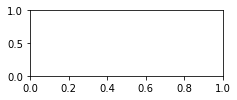

In [24]:
# Plot распределение предикторов во всех числовых колонках

fig = plt.figure(figsize=(20,20))

for i in range(len(num_feat)):
    plt.subplot(14,5, i+1)
    sns.distplot(comb[num_feat[i]], rug=True, hist=False, kde_kws={'bw':0.1})
    plt.title(num_feat[i])
    plt.xlabel("Value")
    plt.ylabel("Count")
    plt.tight_layout()
fig.show()

In [ ]:
# plot распределение в категориальных колонках
fig = plt.figure(figsize=(18, 30))

for i , col in enumerate(cat_feat):
    plt.subplot(12,5, i+1)
    sns.boxplot(x=col, y='y', data=df)
    plt.ylabel("Log() Y")
    plt.tight_layout()
    
fig.show()

In [ ]:
# Сведение данных к более крупным новым блокам
df['data'] = pd.cut(df.Data, 4)

In [ ]:
# Проверка на корреляцию всех числовых колонок
df.corr()
corr_matrix = df[num_feat].corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix.T, annot=True, cbar=False, cmap='coolwarm');

# Отдельно выделяем все, что выше 0.8
corr_matrix = df[num_feat].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr_matrix.T, annot=True, mask= corr_matrix < 0.8 ,cbar=False, cmap='coolwarm');

In [ ]:
#Выбор наибольших строк с наибольшими параметрами в колонке
df.nlargest(3,'data') #Обратный метод - .nsmallest

In [ ]:
# График зависимости отклика от каждого из предикторов в числовых колонках
fig = plt.figure(figsize=(20,20))

for i, col in enumerate(comb[num_feat].columns):
    plt.subplot(12,5, i+1) #Размеры графиков и их координаты на фигуре
    sns.scatterplot(x=comb[col], y=df['y']) 
    plt.tight_layout() #Автоматическое расположение графиков на фигуре
    
fig.show()

In [ ]:
#Повернем фрейм, разбив один столбец на несколько, в зависимости от значений, все объекты выровнены по дате
pivoted_df = df.pivot(index='Date', columns='Code', values='VWAP')

In [ ]:
#Метод if-then. Если условия соблюдены, то производит действия над переменными в фрейме
df.mask(df % 2 == 0, -df) #В данном случае если число четное, то знак меняется на противоположный

In [ ]:
# кросс-таблица (таблица сопряжённости)
pd.crosstab(df['data'], df['data1'])

In [ ]:
# Разбиение переменных на категории и выделение в новый столбец
df['data_new'] = pd.cut(df['data'], bins=[0, 7.90, 14.45, 31.28, 120], labels=[
                        'Low', 'Mid', 'High_Mid', 'High'])

In [ ]:
# Средние показатель выборки по определенному параметру
df[df['data'] == 1]['data1'].mean()

# Условие может быть составным
df[(df['data'] == 1) & (df['data1'] == "male")]['data2'].mean()

In [ ]:
# Выборка всех строк из фрейма по конкретному параметру в колонке
grouped = df.groupby('Data').get_group('param')

In [ ]:
# Выбираем из матрицы интересующую нас ячейку
first_patient = df.loc[0, 'data']

In [ ]:
# Выбираем срез из матрицы по интересующим нас колонкам
df.loc[:10, ["data1", "data2"]]

In [ ]:
# Строим график по распределению значений в колонке
(df.Data.value_counts(normalize=True) * 100).plot.barh().set_title(
    "Training Data - Percentage of people survived and Deceased")

In [ ]:
# Строим картинку
df['Survived'].value_counts().plot(kind='bar')
# Добавляем подпись
plt.title(u'Число юзеров')
plt.xticks([0, 1], ['Нет', 'Да'], rotation=None)
plt.text(-0.1, 275, '61.5%', fontsize=15, color='silver')
plt.text(0.9, 150, '38.5%', fontsize=15, color='silver')

In [ ]:
# Круговая диаграмма.
ax.get_figure().suptitle('')  # Исправить наезжающие заголовки графика
# Чтобы подписи к картинкам отображались корректно по-русски
matplotlib.rc('font', family='Arial')

fig, ax = plt.subplots(1)
df['data'].value_counts().plot(kind='pie', labels=['', ''],
                               ax=ax, autopct='%.2f%%', fontsize=15)
ax.set_title(u'title')
ax.axis('equal')
ax.legend(labels=[u'param', u'param2'], framealpha=0)
ax.set_ylabel('')
plt.tight_layout()

In [ ]:
# Countplot - распределение значений внутри предиктора по параметрам второго предиктора
sns.countplot(y='data', hue='data1', data=df)

In [ ]:
# Выбор топ-5 параметров из предиктора
top_data = df.Data.value_counts().sort_values(ascending = False).head(5).index.values

# График бокс-плота топа предиктора для отклика
sns.boxplot(y='data', x='y', data=df[df.Data.isin(top_data)], orient = 'h')

In [ ]:
# Круговая диаграмма распределения значений в колонке
df.Data.value_counts().plot.pie().legend(labels=["Class 3", "Class 1", "Class 2"],
                                         loc='center right',
                                         bbox_to_anchor=(2.25, 0.5)
                                         ).set_title("Training Data - People travelling in different classes")

In [ ]:
# График сравнения значений в колонках по дополнительному признаку из другой колонки. В процентах

data1 = round((df[df.Data == 1].Data4 == 1).value_counts()
              [1]/len(df[df.Data == 1]) * 100, 2)
data2 = round((df[df.Data == 2].Data4 == 1).value_counts()
              [1]/len(df[df.Data == 2]) * 100, 2)
data3 = round((df[df.Data == 3].Data4 == 1).value_counts()
              [1]/len(df[df.Data == 3]) * 100, 2)
pclass_perc_df = pd.DataFrame(
    {"Percentage Data4": {"Class 1": data1, "Class 2": data2, "Class 3": data3},
     "Percentage Not Data4": {"Class 1": 100-data1, "Class 2": 100-data2, "Class 3": 100-data3}})
pclass_perc_df.plot.bar().set_title(
    "Training Data - Percentage of Data4 for 3 other params in Data")

In [ ]:
# Вариант графика сравнения, две бинарных переменных
df['data_new'] = pd.cut(df.Data, [0, 10, 20, 30, 40, 50, 60, 70, 80])
sns.countplot(x="data_new",
              hue="data1",
              data=df,
              palette=["C1", "C0"]).legend(labels=["Да", "Нет"]
                                           )

In [ ]:
# График распределения переменных по характеристике второй переменной
for x in [1, 2, 3]:  # задаем число классов
    df.Data[df.data1 == x].plot(kind="kde")
plt.title("title")
plt.legend(("1st", "2nd", "3rd"))

In [ ]:
# Вариант графика сравнения, две бинарных переменных
sns.distplot(df['data'].dropna(),
             color='darkgreen',
             bins=30
             )

In [ ]:
# Тепловая карта суммарных значений параметров двух предикторов для отклика
platform_genre_sales = df.pivot_table(
                        index='data',
                        columns='data1',
                        values='y',
                        aggfunc=sum).fillna(0).applymap(float)
sns.heatmap(platform_genre_sales, annot=True, fmt='.1f', linewidths=.4)

#Определяем массив данных и задаем title графика в Layout
data = [trace0, trace1]
layout = {'title': 'Statistics of video games'}

In [ ]:
# Временной ряд значений двух предикторов по отклику
years_df = df.groupby('timedate')[['y']].sum().join(
    df.groupby('timedate')[['data']].count())
years_df.columns = ['y', 'data1']

# добавим в фрейм час, день недели и выходной в качестве категориальных переменных
df.index = df.index.to_datetime()
df["hour"] = df.index.hour
df["weekday"] = df.index.weekday
df['is_weekend'] = df.weekday.isin([5,6])*1
df.head()

# Посмотрим на средние по дням недели
code_mean(data, 'weekday', "y")

# Для увеличения числа признаков используют множество метрик (см.  библиотека tsfresh)

# создаем линию для первого предиктора
trace0 = go.Scatter(x=years_df.index, y=years_df.Y, name='title')

# создаем линию для второго предиктора
trace1 = go.Scatter(x=years_df.index, y=years_df.Data1, name='title')

#Определяем массив данных и задаем title графика в Layout
data = [trace0, trace1]
layout = {'title': 'Statistics'}

# создаем объект Figure и визуализируем его
fig = go.Figure(data=data, layout=layout)
iplot(fig, show_link=False)

#Можно открыть график в html файле
plotly.offline.plot(fig, filename='years_stats.html', show_link=False)

In [ ]:
# Box trace для каждого параметра из предиктора по значениям второго предиктора
data = []
for col in df.Data.unique():
    data.append(
        go.Box(y=df[df.Data==col].Data1, name=genre)
    )

iplot(data, show_link = False)

In [ ]:
# Вероятностная гистограмма
df['data'].hist(density=True, bins=60)
# Сравнение гистограмм
df.groupby('data')['data'].plot.hist(alpha=.6)
plt.legend()

In [ ]:
# Линейная гистограмма
ss = pd.DataFrame()
ss['survived'] = df.Data1
ss['sibling_spouse'] = pd.cut(
    df.Data2, [0, 1, 2, 3, 4, 5, 6, 7, 8], include_lowest=True)
(ss.sibling_spouse.value_counts()).plot.area().set_title(
    "Training Data - Number of siblings or spouses vs survival count")

In [ ]:
# Проверка на тип тренда (линейный или нет), тип сезонности (аддитивный или мультипликативный), его длину, выбросы
# Видим линейный тренд и мультипликативную сезонность. Это подтверждает логирафмирование цикла

fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121)
df['data'].plot(ax=ax1)
ax1.set_title(u'title')
ax1.set_ylabel(u'label')

ax2 = fig.add_subplot(122)
pd.Series(np.log10(df['data'])).plot(ax=ax2)
ax2.set_title(u'log10 от title')
ax2.set_ylabel(u'log10 от label')

In [ ]:
# Быстрая проверка по интересующим нас данным. Перебор -> результат
age = df['data']
age[age < 22].shape[0]

In [ ]:
# В случае очевидного смешения двух нормальных распределений, можно оценить их более подробно
df.groupby('data')['data1'].plot.hist(alpha=0.6)
df.groupby('data')['data1'].plot.hist(density=True)  # Нормализованный вариант
plt.legend(loc='upper left')

In [ ]:
# Первый признак разбивает на классы, второй дает среднее значение параметра по группе
df.groupby('data')['data1'].mean().round().plot(kind='bar')
plt.ylabel('label')  
plt.show()

In [ ]:
# Матрица диаграмм рассеивания: комплексное сравнение по нескольким переменным. Диагональ - ядерная оценка плотности
colors = {'genuine': 'green', 'counterfeit': 'red'}
scatter_matrix(df,
               figsize=(6, 6),  # размер картинки
               diagonal='kde',  # плотность вместо гистограммы на диагонали
               c=df['data'].replace(colors),  # цвета классов
               alpha=0.2  # степень прозрачности точек
               )

In [ ]:
# Scatter плот для исследования пар числовых признаков
plt.scatter(df['Sex'], df['Pclass'])
# Для изучения совместного распределения двух числовых признаков
sns.jointplot(x='height', y='weight', data=df)

In [ ]:
# Для исследования трёх и более признаков сводные таблицы (pivot tables)
# Index - признаки, по которым выполняется группировка. Values - признаки, по которым вычисляются значения функции
df.pivot_table(values=['age', 'cardio'], index=[
               'smoke', 'alco'], aggfunc='mean')

In [ ]:
# График построенный на новом фрейме, созданном из колонок, выделенных по схожим названиям
data_df = df[[x for x in df.columns if '_data' in x] + ['data1']]
sales_df.groupby('data1').sum().plot()

In [ ]:
# Анализ объектов в колонке. Выделение уникальных, сплит по знакам и выделение в отдельную колонку
df['data_new'] = df.Data.apply(lambda name: name.split(',')[
                               1].split('.')[0].strip())
df.Data.nunique()

# Построение облачного графика из объектов, где размер коррелирует с частотой
wc = WordCloud(width=1000, height=450, background_color='white').generate(
    str(df.Data_new.values))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

df.Data_new.value_counts()

In [ ]:
x = np.arange(0, 5, 0.1)


def f(x):
    return x**2


def h(x):
    return np.sin(x)


def k(x):
    return np.cos(x)


def m(x):
    return np.tan(x)


fig = go.Figure()  # создаем фигуру
fig = make_subplots(rows=2,  # Создание нескольких графиков на одной фигуре
                    cols=2,  # Число колонок на фигуре
                    column_widths=[1, 1],  # Пропорции размера графиков
                    specs=[  # Указываем расположение графиков в фигуре
                        # Указываем что первый график двойной. Чтобы объединить по гризонтали colspan
                        [{'rowspan': 2}, {}],
                        [None, {}]  # Выбрасываем нижнего соседа первого графика None
                    ]
                    )
fig.update_yaxes(range=[-0.5, 2.5],  # Зум к определенному участку на графике
                 zeroline=True,  # Рисует оси на графике
                 zerolinewidth=2,
                 zerolinecolor='LightPink',
                 col=2  # Уточнение к какой колонке применять
                 )
fig.update_xaxes(range=[-0.5, 2.5], zeroline=True,
                 zerolinewidth=2, zerolinecolor='#008000', col=2)
fig.add_trace(go.Scatter(x=x,
                         y=x**2,
                         name='f(x)=x<sup>2</sup>',  # HTML в подписях
                         mode='lines+markers'),
              1,  # Координаты на фигуре, указывающие к какому графику принадлежат
              2
              )
fig.add_trace(go.Scatter(x=x,
                         y=x,
                         name='g(x)=x',  # Метод графика с плавной линией
                         mode='markers'
                         ),
              1,
              2
              )

fig.add_trace(go.Scatter(visible='legendonly',  # Невидимый режим, показывается только при клике на легенду
                         x=x,
                         y=h(x),
                         name='x=sin(x)'),
              2,
              2
              )
fig.add_trace(go.Scatter(visible='legendonly',
                         x=x,
                         y=m(x),
                         name='x=tan(x)'),
              1,
              1
              )
fig.update_layout(legend_orientation='h',  # Смещение легенды под график
                  # Убрать отступы вокруг графика
                  margin=dict(l=0, r=0, t=30, b=0),
                  # Смещение легенды по центру
                  legend=dict(x=.5, xanchor="center"),
                  hovermode='x',  # Показывает одновременно все значения Y для точки Х
                  title='Заголовок',
                  xaxis_title='ось Х',
                  yaxis_title='ось Y'
                  )
fig.update_traces(hoverinfo='all',  # Отображается значение подписи на курсоре. Например 'x+y'
                  hovertemplate='Аргумент: %{x}<br>Функция: %{y}'
                  )
fig.update_xaxes(title='Ось Х графика 1', col=1, row=1)
fig.update_yaxes(title='Ось Y графика 1', col=1, row=1)
fig.update_xaxes(title='Ось Х графика 2', col=2, row=1)
fig.update_yaxes(title='Ось Y графика 2', col=2, row=1)
fig.update_xaxes(title='Ось Х графика 3', col=2, row=2)
fig.update_yaxes(title='Ось Y графика 3', col=2, row=2)

fig.show()

In [ ]:
# t-distributed Stohastic Neighbor Embedding - отображение из многомерного признакового пространства на плоскость
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# преобразуем все признаки в числовые, выкинув номинальные
X = df.drop([cat_feat], axis=1)
X['data'] = pd.factorize(X['data'])[0]
X['data1'] = pd.factorize(X['data1'])[0]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

tsne = TSNE(random_state=17)
tsne_representation = tsne.fit_transform(X_scaled)

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1])

plt.scatter(tsne_representation[:, 0], tsne_representation[:, 1],
            c=df['y'].map({0: 'blue', 1: 'orange'}))

_, axes = plt.subplots(1, 2, sharey=True, figsize=(16, 6))

axes[0].scatter(tsne_representation[:, 0], tsne_representation[:, 1],
                c=df['data'].map({'Yes': 'blue', 'No': 'orange'}))
axes[1].scatter(tsne_representation[:, 0], tsne_representation[:, 1],
                c=df['data1'].map({'Yes': 'blue', 'No': 'orange'}))
axes[0].set_title('title')
axes[1].set_title('title1')

In [ ]:
# Вставляем изображения в блокнот
display(Image(url='https://habrastorage.org/webt/9m/2c/zd/9m2czdt-uv7oe6v-nws3frtw7-a.jpeg', width = 200))

In [ ]:
#Описываем все колонки: тип, заполненность, охват значений, значения предикторов

* [Проверка разницы между train и test](https://www.kaggle.com/tunguz/adversarial-santander)<br>

In [ ]:
columns = ['SEQN', 'Alcohol101', 'Alcohol110', 'Alcohol130', 'Smoking', 'Gender',
       'Age', 'Race', 'Country', 'Education', 'Family', 'HouseSize',
       'Salary', 'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BloodPressureSY1', 'BloodPressureDI1', 'BloodPressureSY2',
       'BloodPressureDI2', 'Weight', 'Height', 'BodyIndex', 'BodyLeg', 'BodyArm', 'BodyArm2',
       'BodyWaist', 'HIQ210']